<a href="https://colab.research.google.com/github/PaulToronto/TensorFlow-Deep-Dive---Course/blob/main/Module_2_Building_Machine_Learning_Models_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Building Machine Learning Models with TensorFlow

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

## 2.1 Introduction to NumPy

- NumPy provides bindings to high-peforming compiled languages
    - Much more peformant for numerical computing than general Python objects
- `.numpy` attached to some TensorFlow objects
- NumPy idioms are used when working with the shape of TF objects
- NumPy's basic object is teh **homogeneous multidimensional array**
    - homogeneous it terms of `.dtype` of the elements
    - https://numpy.org/doc/stable/user/basics.types.html
- Excellent book for a deeper coverage of NumPy:
    - https://learning.oreilly.com/library/view/python-data-science/9781098121211/

In [2]:
x = np.array([0, 0, 0])
x.dtype, x.shape

(dtype('int64'), (3,))

In [3]:
x

array([0, 0, 0])

In [4]:
print(x)

[0 0 0]


In [5]:
y = np.ones([1, 3])
y.dtype, y.shape

(dtype('float64'), (1, 3))

In [6]:
y

array([[1., 1., 1.]])

In [7]:
print(y)

[[1. 1. 1.]]


In [8]:
x + y * 2

array([[2., 2., 2.]])

In [9]:
# a pointer to a specific location in memory
#. the data in an array is contiguous in memory which is why
#. they are so efficient
x.data

In [10]:
y.data

## 2.2 From Arrays to Tensors

### An RGB image in Numpy

- We need to store data for the image size and 3 channels
- The channels are R, G and B for red, green and blue respectively
- Nested arrays can determine the dimensionality

In [11]:
my_image = np.zeros([8, 8, 3], dtype=int)
my_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],


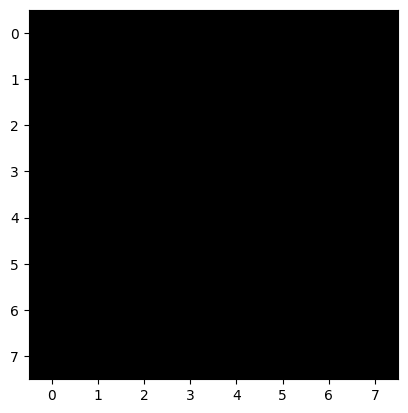

In [12]:
plt.imshow(my_image, interpolation='nearest');

In [13]:
# 7th row of the image      `7`
# all columns               `:`
# first two color channels  `:2`
my_image[7, :, :2] = 254
my_image

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0

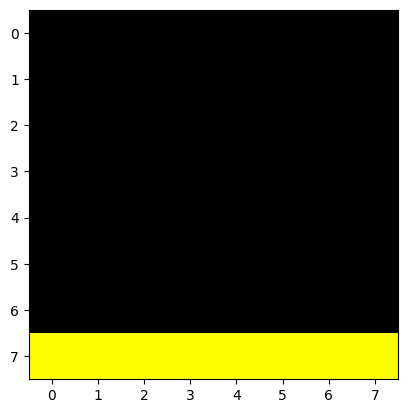

In [14]:
plt.imshow(my_image, interpolation='nearest');

### Working with NumPy in TensorFlow

- main objective is to ensure consistent matrices in your inputs and outputs
- https://numpy.org/doc/stable/user/basics.html

## 2.3 Fundamental Concepts and Building Blocks of the TensorFlow Framework

### What are tensors?

- Immutable array
- Defined data type
- Defined shape
- Have many more computational capabilities than a regular Python list
    - Due to the constraints:
        - Work better in GPUs
        - Can be parallelized
- Can do any type of math with tensors, including matrix operations
- Because they are immutable, we need somewhere to store their state
- Variables in TensorFlow are not regular Python variables
    - They are a construct of the TensorFlow API, that IS mutable, but otherwise looks like a tensor
    - For variables, mutability is handled with the `.assign()` method

```python
# Reassign values on a Tensor
#. doesn't work, Tensors are immutable
X[0, 0] = 1
# Type Error

# Variables
var.assign([1, 0])
var
```

- TensorFlow is an **extensible** platform
    - **Functions** let us take a custom Python function, annotate it using Python decorators, so that it can become a TensorFlow function
- TensorFlow takes care of optimizing our code using the TensorFlow graph: `tf.Graph()`
    - the graph is the way that TensoFlow analyzes our code so that it can optimize it in a memory and compute conserving way
    - allows us to train machine learning models faster
    - also makes inference faster
    - if our TensorFlow program runs code that is not part of this `tf.Graph`, we are essentially dropping out of the TensorFlow platform, so we don't get the optimization benefits in that part of the code
        - sometimes dropping out of the platform is beneficial, but for the most part, we want to stay in the graph

```python
@tf.function
def cool_stuff(x):
    print('Making your Tensorr cool!')
    return tf.assign([3, 0, 0, 1])
```

### Processing Units

- **Central Processing Unit (CPU)**:
    - Basic compute unit
- **Graphics Processing Unit (GPU)**:
    - Intially developed for video games
    - Calculations that are parallelizable or vectorized
    - Popular in training large language models
- **Tensor Processing Unit (TPU)**:
    - Purpose built for AI workloads
    - Sometimes, but not always, they out perform GPUs

### TensorFlow Building Blocks - Hands-on

- can be installed with pip install

In [15]:
# import tensorflow as tf
# already imported in Imports section

tf.__version__

'2.17.0'

In [16]:
# tf.constant outputs a Tensor
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [17]:
print(x)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


In [18]:
x.dtype, type(x)

(tf.float32, tensorflow.python.framework.ops.EagerTensor)

In [19]:
x.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [20]:
type(x.numpy())

numpy.ndarray

## 2.4 Simple Predictions Modeling

- Palmer Penguins dataset
- https://allisonhorst.github.io/palmerpenguins/
- We can find the dataset in the TensorFlow datasets package

### The Data

In [21]:
# import tensorflow_datasets as tfds
# already imported in Imports section

ds, info = tfds.load(
    'penguins',
    with_info=True
)

In [22]:
type(ds), type(info)

(dict, tensorflow_datasets.core.dataset_info.DatasetInfo)

In [23]:
ds

{'train': <_PrefetchDataset element_spec={'features': TensorSpec(shape=(4,), dtype=tf.float32, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [24]:
ds.keys()

dict_keys(['train'])

In [25]:
type(ds['train'])

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [26]:
train = ds['train']
train

<_PrefetchDataset element_spec={'features': TensorSpec(shape=(4,), dtype=tf.float32, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [27]:
len(list(train.as_numpy_iterator())), list(train.as_numpy_iterator())[0]

(334,
 {'features': array([0.6545454 , 0.22619048, 0.89830506, 0.6388889 ], dtype=float32),
  'species': 2})

In [28]:
ds.get('train')

<_PrefetchDataset element_spec={'features': TensorSpec(shape=(4,), dtype=tf.float32, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [29]:
for item in ds.get('train').take(5):
    print(item)

{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.6545454 , 0.22619048, 0.89830506, 0.6388889 ], dtype=float32)>, 'species': <tf.Tensor: shape=(), dtype=int64, numpy=2>}
{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.36      , 0.04761905, 0.6440678 , 0.4027778 ], dtype=float32)>, 'species': <tf.Tensor: shape=(), dtype=int64, numpy=2>}
{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.68      , 0.30952382, 0.91525424, 0.6944444 ], dtype=float32)>, 'species': <tf.Tensor: shape=(), dtype=int64, numpy=2>}
{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.6181818 , 0.20238096, 0.8135593 , 0.6805556 ], dtype=float32)>, 'species': <tf.Tensor: shape=(), dtype=int64, numpy=2>}
{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.5527273 , 0.26190478, 0.84745765, 0.7083333 ], dtype=float32)>, 'species': <tf.Tensor: shape=(), dtype=int64, numpy=2>}


### Create the model using `Sequential` API

- Takes a list of layers to build our machine learning model in a simple feed forward neural network


In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),                  # Input layer for 4 features
    tf.keras.layers.Dense(10, activation=tf.nn.relu),   # Hidden layer
    tf.keras.layers.Dense(3, activation=tf.nn.relu),    # Hidden layer
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)  # Output layer for 3 classes
])

model

<Sequential name=sequential, built=True>

In [31]:
type(model)

keras.src.models.sequential.Sequential

In [32]:
model.input_shape, model.output_shape

((None, 4), (None, 3))

#### Activation Functions

- The **softmax** activation function, also known as the normalized exponential function, is particularly useful within the context of multi-class classification problems
- **Rectified Linear Unit (ReLu)** keeps gradients above 0

### Compile the Model

- The model gets compiled into a TensorFlow computational graph

#### Optimizer and Loss Function

- For our optimize, `SGD()` is chosen
- Because this is a classification problem with multiple labels, we can pick `SparseCategoricalCrossentropy()` for out loss funciton

In [33]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
losses = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(loss=losses,
              optimizer=optimizer,
              metrics=['accuracy'])

In [34]:
model.compiled

True

### Simple Predictions

- batch
- cache
- prefectch
- This code doesn't run because we don't yet have a test set
    - We also have not trained the model
    - I'm hoping this will be clearer as the tutorial continues

```python
ds_test = ds_test.batch(8)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

predictions = model.predict(ds_test)

print(tf.argmax(predictions))
```

```python
labels = np.concatenate([y for x, y in ds_test])

# accuracy calculation
(predictions == labels).sum() / len(labels)
```

### Training

- Not sure why the tutorial covered predictions before training

In [35]:
ds_train = ds['train'].batch(32)

In [36]:
ds_train

<_BatchDataset element_spec={'features': TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), 'species': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>

In [37]:
ds_train = ds_train.cache()
ds_train

<CacheDataset element_spec={'features': TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), 'species': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>

In [38]:
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)
ds_train

<_PrefetchDataset element_spec={'features': TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), 'species': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}>

In [39]:
epochs = 30
history = model.fit(
    ds_train,
    epochs = epochs
)

Epoch 1/30


ValueError: None values not supported.